In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
df = pd.read_csv('wine.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
labels = df[0]
del df[0]

In [4]:
model_pca = PCA(n_components=6)
wine_pca = model_pca.fit_transform(df)
wine_pca = wine_pca.reshape((len(wine_pca), -1))

[t-SNE] Computing 4 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.001s...
[t-SNE] Computed neighbors for 178 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 1.024201
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.398964
[t-SNE] KL divergence after 1000 iterations: 2.195380
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.001s...
[t-SNE] Computed neighbors for 178 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 7.205146
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.682838
[t-SNE] KL divergence after 1000 iterations: 0.209623
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.001s...
[t-SNE] Computed neighbors for 178 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 9.052972
[t-SNE] KL divergence after 250 iteration

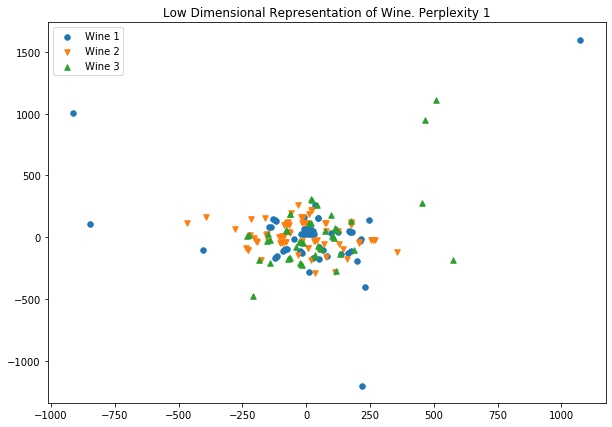

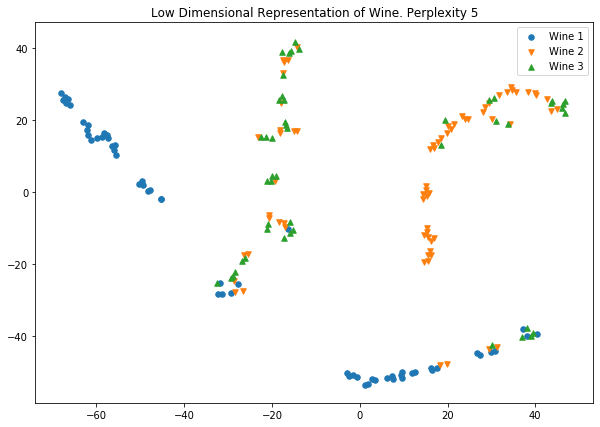

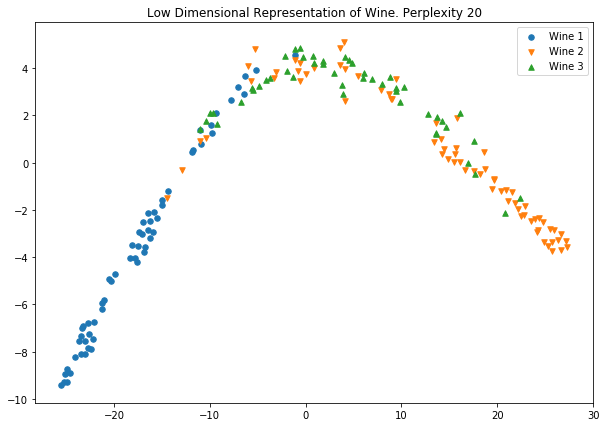

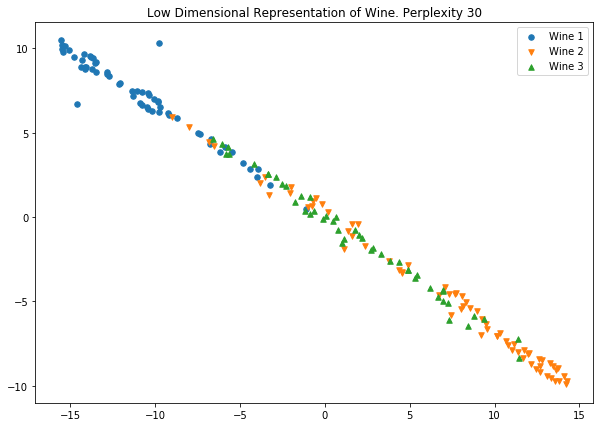

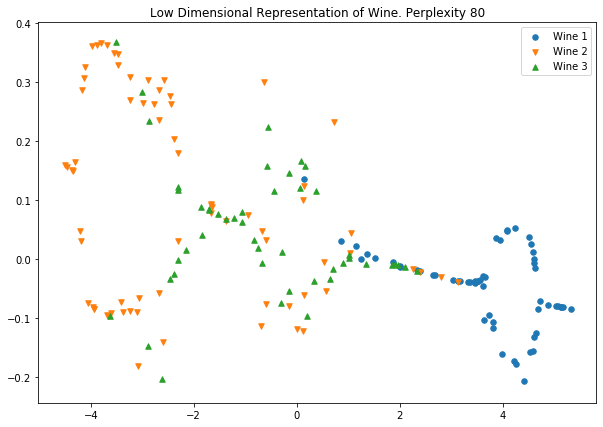

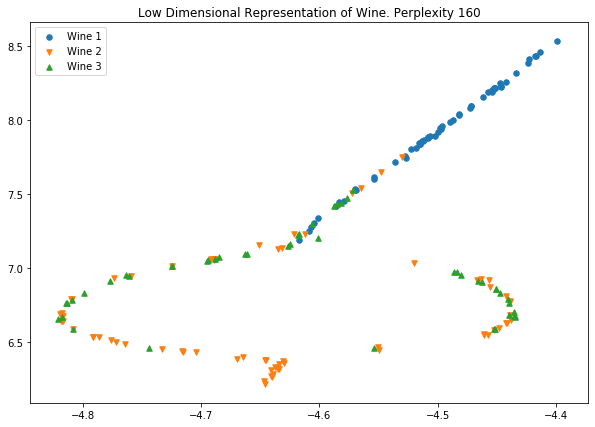

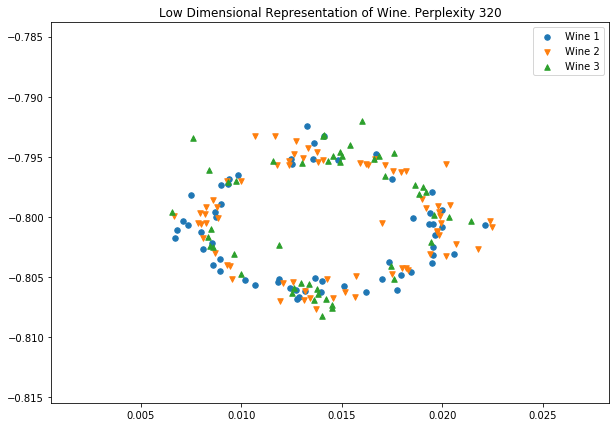

In [5]:
MARKER = ['o', 'v', '^',]
for perp in [1, 5, 20, 30, 80, 160, 320]:
    tsne_model = TSNE(random_state=0, verbose=1, perplexity=perp)
    wine_tsne = tsne_model.fit_transform(wine_pca)
    plt.figure(figsize=(10, 7))
    plt.title(f'Low Dimensional Representation of Wine. Perplexity {perp}')
    for i in range(1, 4):
        selections = wine_tsne[labels == i]
        plt.scatter(selections[:,0], selections[:,1], marker=MARKER[i-1], label=f'Wine {i}', s=30)
        plt.legend()
plt.show()